In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [119]:
df = pd.read_csv('heart_data.csv')

In [120]:
df.head()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        70000 non-null  int64  
 1   id           70000 non-null  int64  
 2   age          70000 non-null  int64  
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  int64  
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.5 MB


## Data Taxonomy and Variable Nature
- age: (int64), **ratio** because it is numerical and has a natural 0 value
- gender: (int64), **nominal** because it is categorical and does not have a natural order
- height: (int64), **ratio** because it is numerical and has a natural 0 value
- weight: (float64), **ratio** because it is numerical and has a natural 0 value
- ap_hi: (int64), **ratio** because it is numerical and has a natural 0 value
- ap_lo: (int64), **ratio** because it is numerical and has a natural 0 value
- cholesterol: (int64), **ratio** because it is numerical and has a natural 0 value
- gluc: (int64), **ratio** because it is numerical and has a natural 0 value
- smoke: (int64), **nominal** because it is categorical and does not have a natural order
- alco: (int64), **nominal** because it is categorical and does not have a natural order
- active: (int64), **nominal** because it is categorical and does not have a natural order
- cardio: (int64), **nominal** because it is categorical and does not have a natural order

In [122]:
df.describe()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,34999.500000,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,20207.403759,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17499.750000,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,34999.500000,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,52499.250000,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,69999.000000,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [123]:
for col in df.columns:
    print(df[col].value_counts())

index
69983    1
69982    1
69981    1
69980    1
69979    1
        ..
4        1
3        1
2        1
1        1
0        1
Name: count, Length: 70000, dtype: int64
id
99974    1
99973    1
99972    1
99971    1
99969    1
        ..
4        1
3        1
2        1
1        1
0        1
Name: count, Length: 70000, dtype: int64
age
19741    32
18236    32
20442    31
20376    31
18253    31
         ..
17241     1
16077     1
19433     1
22063     1
21451     1
Name: count, Length: 8076, dtype: int64
gender
1    45530
2    24470
Name: count, dtype: int64
height
165    5853
160    5022
170    4679
168    4399
164    3396
       ... 
131       1
59        1
66        1
99        1
57        1
Name: count, Length: 109, dtype: int64
weight
65.0     3850
70.0     3764
68.0     2831
75.0     2740
60.0     2710
         ... 
67.3        1
94.7        1
147.0       1
55.4        1
99.9        1
Name: count, Length: 287, dtype: int64
ap_hi
120     27699
140      9506
130      8961
110      8

In [124]:
df.isnull().sum()

index          0
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

# Data Cleaning: Remove Unnecessary Columns

In [125]:
df.drop(['index', 'id'], axis=1, inplace=True)

# Data Wrangling: Change Age from Days to Years

In [126]:
df['age'] = df['age'] / 365

# Data Aggregation: Numerical Columns by Gender

In [127]:
# Copy df and map 1,2 to male,female
df_by_gender = df.copy()

df_by_gender['gender'] = df_by_gender['gender'].map({1:'Male',2:'Female'})

In [128]:
# Group by gender
df_by_gender = df_by_gender.groupby(['gender'])

In [129]:
# Apply aggregate function for rounded mean of numerical columns
def mean_round(x):
    return round(x.mean(), 2)

df_by_gender[['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc']].apply(mean_round)

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc
gender,,,,,,,
Female,53.13,169.95,77.26,130.08,100.55,1.33,1.21
Male,53.45,161.36,72.57,128.14,94.52,1.38,1.24


# Data Visualization: 5 Visualizations

In [130]:
# Set color palette for visualizations
sns.set_palette('Set2')

## Visualization 1: Bar Chart - Entries per Gender

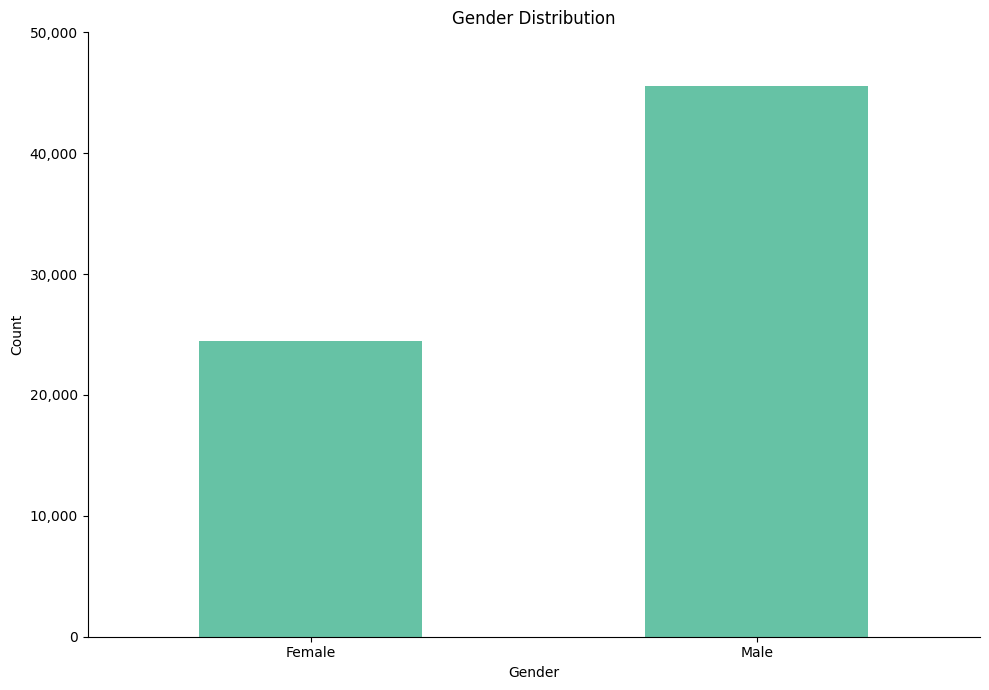

In [131]:
# Plot to show difference in entries per gender
df_by_gender['gender'].value_counts().plot(kind='bar', title='Gender Distribution', xlabel='Gender', ylabel='Count', figsize=(10, 7))

# Rename x-ticks to Title case (from female, male to Female, Male)
plt.xticks([0, 1], ['Female', 'Male'])

# Reset rotation to horizontal, readable format
plt.xticks(rotation=0)

# Change y-axis ticks to be comma-separated for readability
plt.yticks([0, 10000, 20000, 30000, 40000, 50000], ['0', '10,000', '20,000', '30,000', '40,000', '50,000'])

plt.tight_layout()
sns.despine()
plt.show()

## Visualization 2: Box Plot - Age per Gender

/var/folders/hn/8p1b_k2127zf_kp_238tglf00000gn/T/ipykernel_9340/1814336869.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='age', data=df, palette='Set2')


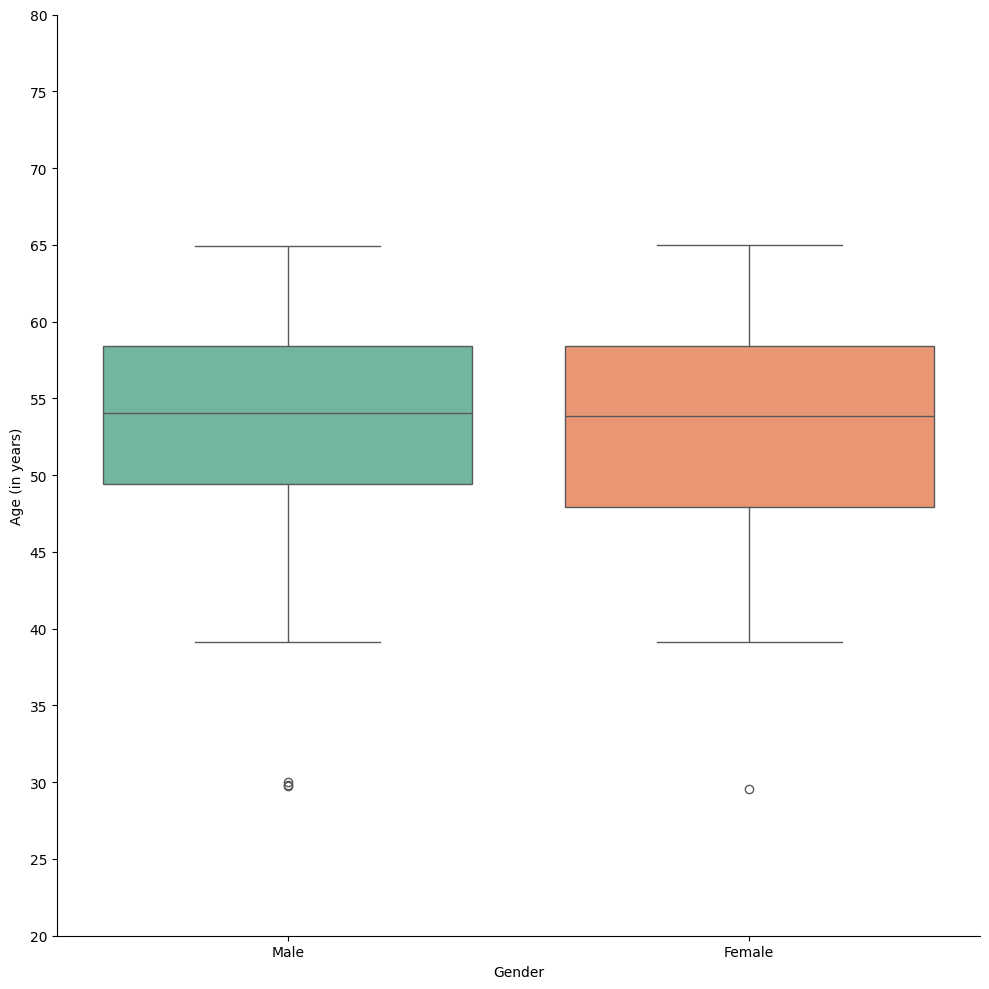

In [132]:
# Box plot of age per gender
plt.figure(figsize=(10, 10))
sns.boxplot(x='gender', y='age', data=df, palette='Set2')

# Rename x-ticks to gender names
plt.xticks([0, 1], ['Male', 'Female'])

# Add axes labels
plt.xlabel('Gender')
plt.ylabel('Age (in years)')

# Change range of y-axis
plt.ylim(20, 80)

# Add more ticks between y-axis
plt.yticks([20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80])

plt.tight_layout()
sns.despine()
plt.show()

## Visualization 3: Histogram - Numerical Columns

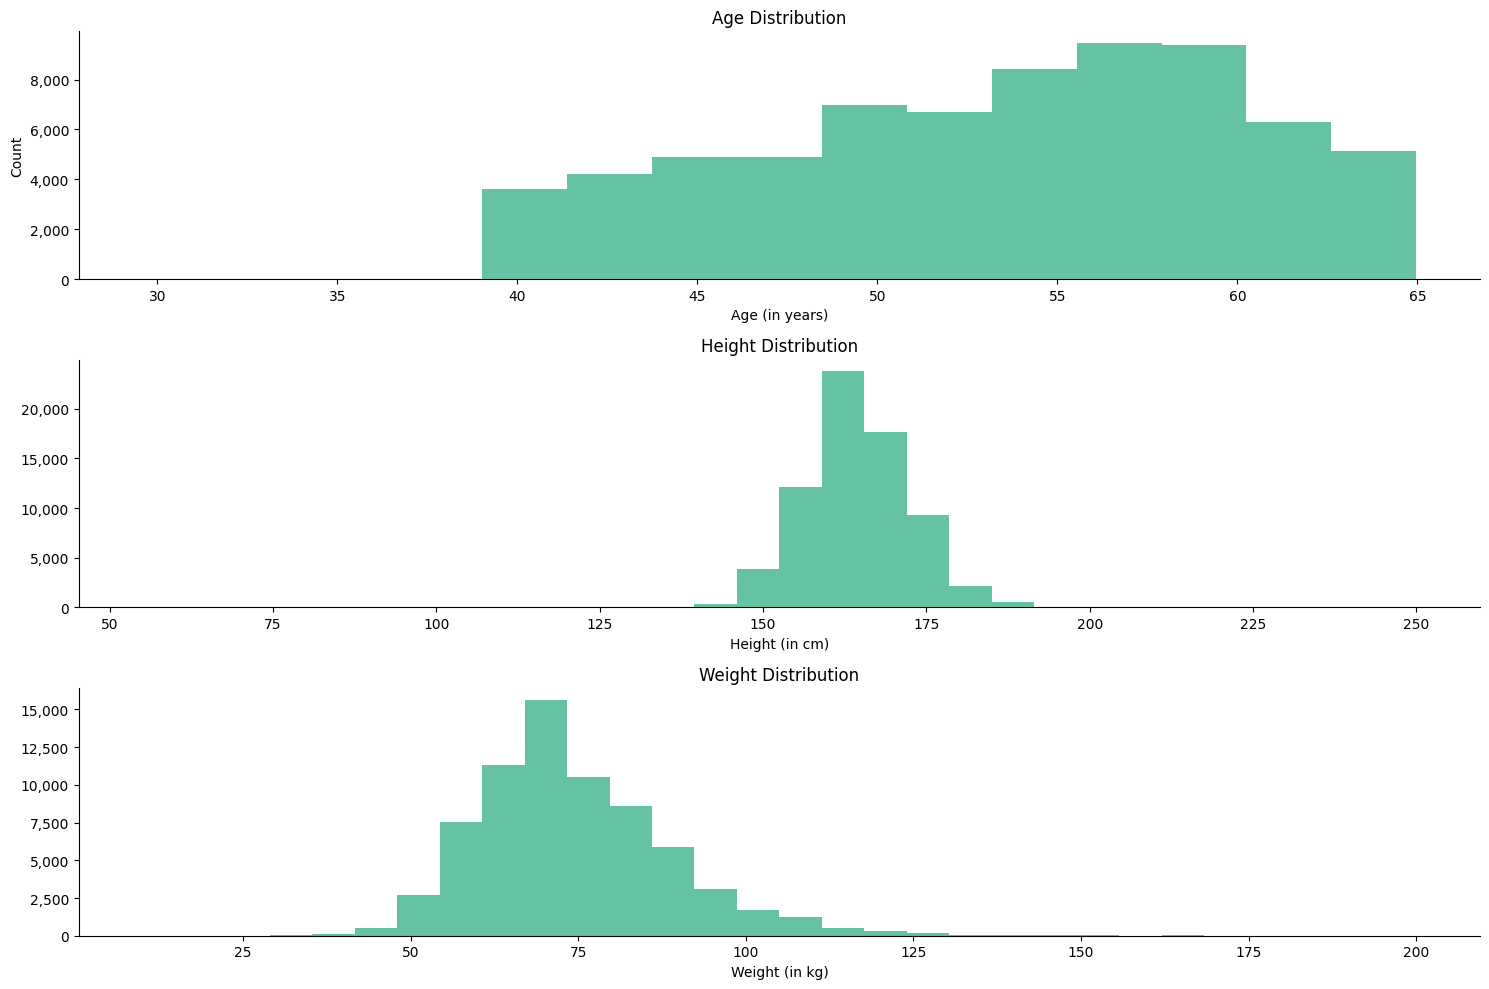

In [163]:
fig, axes = plt.subplots(3, 1, figsize=(15, 10))

axes[0].hist(df['age'], bins=15)
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age (in years)')
axes[0].set_ylabel('Count')
axes[0].set_yticks([0, 2000, 4000, 6000, 8000], ['0', '2,000', '4,000', '6,000', '8,000'])

axes[1].hist(df['height'], bins=30)
axes[1].set_title('Height Distribution')
axes[1].set_xlabel('Height (in cm)')
# axes[1].set_ylabel('Count')
axes[1].set_yticks([0, 5000, 10000, 15000, 20000], ['0', '5,000', '10,000', '15,000', '20,000'])

axes[2].hist(df['weight'], bins=30)
axes[2].set_title('Weight Distribution')
axes[2].set_xlabel('Weight (in kg)')
# axes[1].set_ylabel('Count')
axes[2].set_yticks([0, 2500, 5000, 7500, 10000, 12500, 15000], ['0', '2,500', '5,000', '7,500', '10,000', '12,500', '15,000'])

plt.tight_layout()
sns.despine()
plt.show()

## Visualization 4: Scatter Plot - Cholesterol vs Glucose

## Visualization 5: Bar Chart - Average Health Metrics Between Present vs Non-Present Cardiovascular Disease